# 1. Report variational inference update equation for $\gamma$, $\phi$

$N_m=\sum_{j=1}^{200} D_{mj}$ 

where

$D_{mj}$ is the number of ocurrences of genotype $j$ in individual $m$

* for $n=1,..,N_m$

 * for $i=1,..,4$

   * $\phi_{ni}^{t+1}=\beta_{w_n i}\exp(\Phi(\gamma_i^t)-\Phi(\sum_{j=1}^4\gamma_{j}^t))$ 
   * $\beta_{w_n i}$, $w_n$ corresponds to the row of the genotype locus in matrix $\beta$   
 * For a given n, normalize $\phi_{ni}^{t+1}$ over i=1,2,3,4

$\gamma^{t+1}=\alpha+ \sum_{n=1}^{N_m} \phi_{n}^{t+1} $

In [5]:
import numpy as np
import scipy, pandas, datetime
import scipy.io as io
import scipy.special as special
import matplotlib.pyplot as plt

In [6]:
#Load data
data = io.loadmat("./proj2_data.mat")

In [7]:
#Parameters
N=200
K=4
M=100
alpha=np.zeros((K,))+0.1
beta=data["beta_matrix"]
D=data["data"]

# 2. For individual 1, run LDA inference to find $\phi$ for each genotype locus, store it as a matrix of size $n_1 \times K$ (where $n_1$ := $\sum_{1,j} I(D_{1j} \neq 0))$, $I(·)$ being the indicator function, is the number of non-zero genotypes represent in individual 1. Save it as phi1.out

In [4]:
#m_th individual
m=1
#Create array of created loci
loci_list=[]
for i in range(200):
    for j in range(D[m,i]):
        loci_list.append(i)
loci_list=np.array(loci_list)
N=loci_list.shape[0]

In [5]:
#initialize phi & gamma
phi=np.zeros((N,K))+1/4
phi


gamma=alpha+ N/K

In [6]:
#Variational Inference Algo
convergence_gamma = np.nan_to_num(np.inf)
convergence_phi = np.nan_to_num(np.inf)
count=0
while convergence_gamma >= 10**(-3) or convergence_phi >= 10**(-3):
    gamma_prev=gamma
    phi_prev=phi
    for n in range(N):
        for k in range(K):
            loci=loci_list[n]
            Beta=beta[loci,k]
            phi[n,k]=Beta * np.exp(special.digamma(gamma[k])-special.digamma(np.sum(gamma)))
        sum_phi=np.sum(phi,axis=1)
        phi[n,]=phi[n,]/sum_phi[n]
    gamma=alpha+np.sum(phi,axis=0)
    convergence_gamma=np.max(np.abs(gamma_prev-gamma))
    convergence_phi=np.max(np.abs(phi_prev-phi))
    count=count+1

In [7]:
# To write json file from numpy array
import json,codecs
np_array_to_list = phi.tolist()
json_file = "./phi.out" 
json.dump(np_array_to_list, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)

# 3. Construct a matrix $\Theta$ of size M $\times$ K to represent the ancestor assignments for all individuals in the population. For each individual i, run LDA inference to find $\gamma$, and store it as row of ", i.e. $\Theta_i$ = $\gamma$. (hint: update probabilities in log-space to avoid overflow and underflow issues). Save it as Theta.out

In [8]:
alpha=np.zeros((K,))+10
Theta=np.empty((M,K))
count=0
start = datetime.datetime.now()
#m_th individual
for m in range(M):
    #Create array of created loci
    loci_list=[]
    for i in range(200):
        for j in range(D[m,i]):
            loci_list.append(i)
    loci_list=np.array(loci_list)
    N=loci_list.shape[0]
    #initialize phi & gamma
    phi=np.zeros((N,K))+1/4
    gamma=alpha+ N/K
    #Variational Inference Algo
    convergence_gamma = np.nan_to_num(np.inf)
    convergence_phi = np.nan_to_num(np.inf)
    while convergence_gamma >= 10**(-3) or convergence_phi >= 10**(-3):
        gamma_prev=gamma
        phi_prev=phi
        for n in range(N):
            for k in range(K):
                loci=loci_list[n]
                Beta=beta[loci,k]
                phi[n,k]=Beta * np.exp(special.digamma(gamma[k])-special.digamma(np.sum(gamma)))
            sum_phi=np.sum(phi,axis=1)
            phi[n,]=phi[n,]/sum_phi[n]
        gamma=alpha+np.sum(phi,axis=0)
        convergence_gamma=np.max(np.abs(gamma_prev-gamma))
        convergence_phi=np.max(np.abs(phi_prev-phi))
        count=count+1
    Theta[m,:]=gamma
end = datetime.datetime.now()

In [10]:
# To write json file from numpy array
import json,codecs
np_array_to_list = Theta.tolist()
json_file = "./Theta.out" 
json.dump(np_array_to_list, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)

# 4. Report the number of iterations and time taken to get to convergence for running inference on all M individuals. (convergence criteria: absolute change in each value of $\gamma$, $\phi$ is less than e = 1e−3)

In [11]:
#the number of iterations
count
print("The number of iterations are {}.".format(count))
#The time taken to get to convergence
total_time =end-start
print("Script totally ran for :", total_time)

The number of iterations are 1516.
Script totally ran for : 0:00:05.155252


# 5. Repeat the experiments for $\alpha$ = 0.01, $\alpha$ = 1, $\alpha$ = 10, and discuss the change in the ancestor population assignments to the individuals $\Theta$, and iterations required for convergence change as $\alpha$ change

In [12]:
Expected_Theta = np.zeros((3,M,K))
#Looping through different \alpha
for a in range(3):
    count=0
    if a==0:
        alpha=np.zeros((K,))+0.01
    elif a ==1:
        alpha=np.zeros((K,))+1
    elif a ==2:
        alpha=np.zeros((K,))+10
    #m_th individual
    for m in range(M):
        #Create array of created loci
        loci_list=[]
        for i in range(200):
            for j in range(D[m,i]):
                loci_list.append(i)
        loci_list=np.array(loci_list)
        N=loci_list.shape[0]
        #initialize phi & gamma
        phi=np.zeros((N,K))+1/4
        gamma=alpha+ N/K
        #Variational Inference Algo
        convergence_gamma = np.nan_to_num(np.inf)
        convergence_phi = np.nan_to_num(np.inf)
        while convergence_gamma >= 10**(-3) or convergence_phi >= 10**(-3):
            gamma_prev=gamma
            phi_prev=phi
            for n in range(N):
                for k in range(K):
                    loci=loci_list[n]
                    Beta=beta[loci,k]
                    phi[n,k]=Beta * np.exp(special.digamma(gamma[k])-special.digamma(np.sum(gamma)))
                sum_phi=np.sum(phi,axis=1)
                phi[n,]=phi[n,]/sum_phi[n]
            gamma=alpha+np.sum(phi,axis=0)
            convergence_gamma=np.max(np.abs(gamma_prev-gamma))
            convergence_phi=np.max(np.abs(phi_prev-phi))
            count=count+1
        #We calculate the expectation of probability, Theta, for each alpha ath and each individual mth   
        Expected_Theta[a,m,:] = gamma/np.sum(gamma)
    print("alpha = {}, #iterations is {}".format(alpha[0],count))

alpha = 0.01, #iterations is 6044
alpha = 1.0, #iterations is 3434
alpha = 10.0, #iterations is 1516


## Discussion on iterations required for convergence change as $\alpha$ change

$\alpha$ = 0.01, #iterations is 6044

$\alpha$ = 1.0, #iterations is 3434

$\alpha$ = 10.0, #iterations is 1516

We can see that when $\alpha$ increases, the number of iterations needed for convergence decreases. The reason behind this is because $\gamma_i=\alpha_i+\sum_{n=1}^N \phi_{ni}$ and  $\phi_{ni} \propto \beta_{iw_n}\exp(\Psi(\gamma_i^t))$. 

By replacing $\phi_{ni}$ into $\gamma$ term, we get

$\gamma^{t+1}=\alpha+\sum_{n=1}^N normalize(\beta_{w_n}\exp(\Psi(\gamma^t)))$ or $\gamma^{t+1}=\alpha+f(\gamma^{t})$.

We can see that when $\alpha$ is huge, the $\alpha$ is more significant compared to $f(\gamma^{t})$. For example, when $\alpha$ is near infinity, and the term $f(\gamma^{t})$, which is always less than $N$, will not affect the updated $\gamma^{t+1}$ much since $\alpha$ dominates the summation.

In other words, when $\alpha$ is larger it contributes more to the converged value of $\gamma$ and less iterations are needed since the most of the part of $\gamma$ is constant at $\alpha$.

## Discussion on the change in the ancestor population assignments to the individuals 

In [13]:
#Define function to measure the amount of uncertainty represented by a probability distribution.
def entropy(x):
    res = 0
    for i in x:
        res+= -i * np.log(i)
    return res

Here we compare the entropy of expected distribution $\Theta$ of each individual over 100 of them (x axis) for different $\alpha$ and uniform distribution.

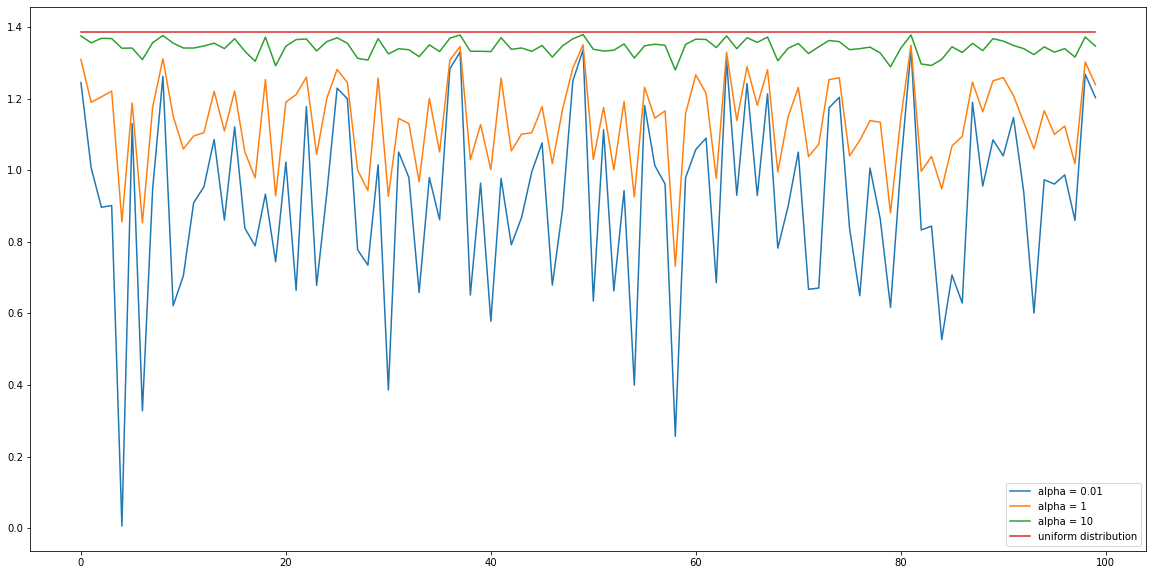

In [14]:
figure = plt.figure(figsize=(20,10))
for a in range(3):
    if a==0:
        alpha="alpha = "+ str(0.01)
    elif a ==1:
        alpha="alpha = "+ str(1)
    elif a ==2:
        alpha="alpha = "+ str(10)
    a_slice = Expected_Theta[a]
    cs = []
    for j in a_slice:
        cs.append(entropy(j))
    plt.plot(cs,label=alpha)
standard_entropy = entropy([0.25]*4)
plt.plot([standard_entropy]*100,label="uniform distribution")
plt.legend()
plt.show()
        

It is suspected that with higher $\alpha$, the population mixture $\theta$ is expected to become nearer to uniform distribution. On the other hand, with lower $\alpha$, the mixture become more biased to one specific ancestor.